In [ ]:
# Nowcasting with Deep-XF

In [ ]:
# install deep-xf library
!pip install deep-xf

     |████████████████████████████████| 9.5 MB 38.9 MB/s 
     |████████████████████████████████| 208 kB 57.9 MB/s 
     |████████████████████████████████| 356 kB 48.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
     |████████████████████████████████| 554 kB 62.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491653 sha256=c7a00c2959c1a67ae1d5bb574adc89bd2be38d53efe52985de30a1c52e29cdad
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43819 sha256=eac492f08810572f6bfd2ab3d3ce1fd678f7d11a3b4d11c2af5f0ea2ee826a9d
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built shap gatspy
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully

In [ ]:
# import deep-xf
from deep_xf.stats import *  # expectation-maximization based dynamic factor model
from deep_xf.dpp import *   # data preprocessing
from deep_xf.utility import *   # helper functions
from deep_xf.main import *      # main wrapper functions call

Imported DeepXF version:0.0.5. Example call by using:

******************   SET FORECAST MODEL/BASE CONFIGURATIONS   ********************

# select algorithms, scaler, etc.
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='rnn', select_user_path='./forecast_folder_path/', select_scaler='minmax', forecast_window=1)

----------------------------------------------------------------------------------

# set variables
ts, fc = Forecast.set_variable(ts='Datetime', fc='PJME_MW')

# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

----------------------------------------------------------------------------------

# set hyperparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = Forecast.hyperparameter_config(hidden_dim=64,layer_dim = 3, batch_size=64, dropout = 0.2, n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

-----------------------------------------------------------

In [ ]:
from google.colab import files
data_to_load = files.upload()# upload canadian climate historical data, you can get file directly from here - https://github.com/ajayarunachalam/Deep_XF/blob/main/data/Canadian_climate_history.csv 
                             # or alternative read data directly from github into the colab notebook 

Saving Canadian_climate_history.csv to Canadian_climate_history.csv


In [ ]:
# Peek into Canadian weather data

In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Canadian_climate_history.csv']))

In [ ]:
df.shape

(29221, 27)

In [ ]:
df.head(4)

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,NaN,-17.0,0.0,NaN,NaN,-25.6,0.0,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,NaN,-16.7,0.5,NaN,NaN,-20.9,0.0,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,NaN,-12.3,0.0,NaN,NaN,-26.4,0.0,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,NaN,-16.4,0.0,NaN,NaN,-32.5,0.0,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0


In [ ]:
df.tail(4)

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
29217,29-Dec-2019 00:00:00,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,NaN,-0.9,0.0,-3.4,0.8,-4.9,0.0,-15.6,NaN,-0.9,5.6,1.1,7.8,7.1,2.4,-2.8,NaN,-10.6,1.7
29218,30-Dec-2019 00:00:00,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,NaN,-2.3,13.4,-2.7,12.7,-5.7,2.7,-15.0,NaN,-0.7,0.7,5.6,8.0,7.5,5.8,-0.1,NaN,-10.9,0.1
29219,31-Dec-2019 00:00:00,4.3,0.0,-2.6,0.0,0.0,11.4,-1.0,NaN,-0.2,11.4,-0.7,6.6,-3.5,8.2,-8.2,NaN,-1.2,0.0,0.4,2.0,8.4,21.2,-1.1,NaN,-12.3,0.0
29220,01-Jan-2020 00:00:00,-0.3,0.0,-4.0,0.0,1.8,0.4,0.2,NaN,0.2,0.9,-0.5,0.0,-2.8,1.5,-7.9,NaN,-0.4,6.4,-1.7,0.0,7.8,0.8,-4.2,NaN,-7.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29221 entries, 0 to 29220
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LOCAL_DATE                      29221 non-null  object 
 1   MEAN_TEMPERATURE_CALGARY        29032 non-null  float64
 2   TOTAL_PRECIPITATION_CALGARY     29048 non-null  float64
 3   MEAN_TEMPERATURE_EDMONTON       21564 non-null  float64
 4   TOTAL_PRECIPITATION_EDMONTON    21575 non-null  float64
 5   MEAN_TEMPERATURE_HALIFAX        22057 non-null  float64
 6   TOTAL_PRECIPITATION_HALIFAX     21995 non-null  float64
 7   MEAN_TEMPERATURE_MONCTON        26885 non-null  float64
 8   TOTAL_PRECIPITATION_MONCTON     26454 non-null  float64
 9   MEAN_TEMPERATURE_MONTREAL       28466 non-null  float64
 10  TOTAL_PRECIPITATION_MONTREAL    28491 non-null  float64
 11  MEAN_TEMPERATURE_OTTAWA         29145 non-null  float64
 12  TOTAL_PRECIPITATION_OTTAWA      

In [ ]:
# check missing values
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row LOCAL_DATE                           0
MEAN_TEMPERATURE_CALGARY           189
TOTAL_PRECIPITATION_CALGARY        173
MEAN_TEMPERATURE_EDMONTON         7657
TOTAL_PRECIPITATION_EDMONTON      7646
MEAN_TEMPERATURE_HALIFAX          7164
TOTAL_PRECIPITATION_HALIFAX       7226
MEAN_TEMPERATURE_MONCTON          2336
TOTAL_PRECIPITATION_MONCTON       2767
MEAN_TEMPERATURE_MONTREAL          755
TOTAL_PRECIPITATION_MONTREAL       730
MEAN_TEMPERATURE_OTTAWA             76
TOTAL_PRECIPITATION_OTTAWA          81
MEAN_TEMPERATURE_QUEBEC           1214
TOTAL_PRECIPITATION_QUEBEC        1227
MEAN_TEMPERATURE_SASKATOON        2473
TOTAL_PRECIPITATION_SASKATOON     3755
MEAN_TEMPERATURE_STJOHNS           808
TOTAL_PRECIPITATION_STJOHNS        822
MEAN_TEMPERATURE_TORONTO            74
TOTAL_PRECIPITATION_TORONTO         80
MEAN_TEMPERATURE_VANCOUVER          53
TOTAL_PRECIPITATION_VANCOUVER       55
MEAN_TEMPERATURE_WHITEHORSE       1691
TOTAL_PRECI

Impute missing values with impute function (modes=0,1, 2, else backfill)
0: impute with zero, 1: impute with mean, 2: impute with median, else impute with backfill method

In [ ]:
df_no_missing = Preprocessing.impute(df=df, modes=1)

In [ ]:
# recheck missing values
print("Missing information for whole dataset")
print("Missing by row", df_no_missing.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df_no_missing.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row LOCAL_DATE                        0
MEAN_TEMPERATURE_CALGARY          0
TOTAL_PRECIPITATION_CALGARY       0
MEAN_TEMPERATURE_EDMONTON         0
TOTAL_PRECIPITATION_EDMONTON      0
MEAN_TEMPERATURE_HALIFAX          0
TOTAL_PRECIPITATION_HALIFAX       0
MEAN_TEMPERATURE_MONCTON          0
TOTAL_PRECIPITATION_MONCTON       0
MEAN_TEMPERATURE_MONTREAL         0
TOTAL_PRECIPITATION_MONTREAL      0
MEAN_TEMPERATURE_OTTAWA           0
TOTAL_PRECIPITATION_OTTAWA        0
MEAN_TEMPERATURE_QUEBEC           0
TOTAL_PRECIPITATION_QUEBEC        0
MEAN_TEMPERATURE_SASKATOON        0
TOTAL_PRECIPITATION_SASKATOON     0
MEAN_TEMPERATURE_STJOHNS          0
TOTAL_PRECIPITATION_STJOHNS       0
MEAN_TEMPERATURE_TORONTO          0
TOTAL_PRECIPITATION_TORONTO       0
MEAN_TEMPERATURE_VANCOUVER        0
TOTAL_PRECIPITATION_VANCOUVER     0
MEAN_TEMPERATURE_WHITEHORSE       0
TOTAL_PRECIPITATION_WHITEHORSE    0
MEAN_TEMPERATURE_WINNIPEG         0
TOTAL_PRECI

In [ ]:
# set nowcasting model parameters
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='em', select_user_path='./NOWCAST_MY/', select_scaler='minmax', forecast_window=5)

select_model = em
select_user_path = ./NOWCAST_MY/
select_scaler = minmax
forecast_window = 5


In [ ]:
df_no_missing.columns

Index(['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO',
       'MEAN_TEMPERATURE_VANCOUVER', 'TOTAL_PRECIPITATION_VANCOUVER',
       'MEAN_TEMPERATURE_WHITEHORSE', 'TOTAL_PRECIPITATION_WHITEHORSE',
       'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG'],
      dtype='object')

In [ ]:
# set variables
ts, fc = Forecast.set_variable(ts='LOCAL_DATE', fc='MEAN_TEMPERATURE_VANCOUVER')

ts = LOCAL_DATE
fc = MEAN_TEMPERATURE_VANCOUVER


In [ ]:
# get variables
model_df, orig_df = Helper.get_variable(df_no_missing, ts, fc)

In [ ]:
model_df.tail(1)

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,value,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,-0.3,0.0,-4.0,0.0,1.8,0.4,0.2,3.206377,0.2,0.9,-0.5,0.0,-2.8,1.5,-7.9,0.967172,-0.4,6.4,-1.7,0.0,7.8,0.8,-4.2,0.729778,-7.0,0.0


In [ ]:
orig_df.head(1)

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,2.65607,-17.0,0.0,4.511569,3.1918,-25.6,0.0,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0


In [ ]:
model_df.columns

Index(['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO', 'value',
       'TOTAL_PRECIPITATION_VANCOUVER', 'MEAN_TEMPERATURE_WHITEHORSE',
       'TOTAL_PRECIPITATION_WHITEHORSE', 'MEAN_TEMPERATURE_WINNIPEG',
       'TOTAL_PRECIPITATION_WINNIPEG'],
      dtype='object')

In [ ]:
ExploratoryDataAnalysis.plot_dataset(df=model_df,fc=fc, title='Canadian Climate daily frequency historical data mean temperatue for vancouver')

In [ ]:
# generate date time features
df_full_features = Features.generate_date_time_features_month(model_df, ['month','day_of_week','week_of_year'])

In [ ]:
df_full_features.columns

Index(['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO', 'value',
       'TOTAL_PRECIPITATION_VANCOUVER', 'MEAN_TEMPERATURE_WHITEHORSE',
       'TOTAL_PRECIPITATION_WHITEHORSE', 'MEAN_TEMPERATURE_WINNIPEG',
       'TOTAL_PRECIPITATION_WINNIPEG', 'month', 'day_of_week', 'week_of_year'],
      dtype='object')

In [ ]:
df_full_features.head(1)

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,value,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG,month,day_of_week,week_of_year
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1940-01-01,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,2.65607,-17.0,0.0,4.511569,3.1918,-25.6,0.0,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0,1,0,1


In [ ]:
# generating cyclic features
df_full_features = Features.generate_cyclic_features(df_full_features, 'day_of_week', 7, 0)
df_full_features = Features.generate_cyclic_features(df_full_features, 'month', 12, 1)
df_full_features = Features.generate_cyclic_features(df_full_features, 'week_of_year', 52, 0)

In [ ]:
df_full_features.head(1)

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,value,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1940-01-01,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,2.65607,-17.0,0.0,4.511569,3.1918,-25.6,0.0,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0,0.0,1.0,0.0,1.0,0.120537,0.992709


In [ ]:
# generate other features
df_full_features = Features.generate_other_related_features(df=df_full_features)

In [ ]:
df_full_features.head(2)

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,value,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,is_holiday
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1940-01-01,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,2.65607,-17.0,0.0,4.511569,3.1918,-25.6,0.0,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0,0.000000,1.00000,0.0,1.0,0.120537,0.992709,1
1940-01-02,-12.0,0.5,2.311584,1.246239,6.565997,3.976417,-14.5,0.0,6.675386,2.65607,-16.7,0.5,4.511569,3.1918,-20.9,0.0,5.00718,4.10222,-13.1,0.3,9.7,7.1,-0.41871,0.729778,-18.4,0.0,0.781831,0.62349,0.0,1.0,0.120537,0.992709,0


In [ ]:
df_full_features.columns

Index(['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO', 'value',
       'TOTAL_PRECIPITATION_VANCOUVER', 'MEAN_TEMPERATURE_WHITEHORSE',
       'TOTAL_PRECIPITATION_WHITEHORSE', 'MEAN_TEMPERATURE_WINNIPEG',
       'TOTAL_PRECIPITATION_WINNIPEG', 'sin_day_of_week', 'cos_day_of_week',
       'sin_month', 'cos_month', 'sin_week_of_year', 'cos_week_of_year',
       'is_holiday'],
      dtype='o

In [ ]:
nowcast_full_data, nowcast_pred_data = EMModel.nowcast(df_full_features, ts, fc, period=5, fq='1d', forecast_window=forecast_window, select_model=select_model)

                         Model Specification: Dynamic Factor Model                         
Model:                Dynamic Factor Model   # of observed variables:                    33
                   + 1 factors in 1 blocks   # of factors:                                1
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                1940-01-01 00:00:00   Standardize variables:                    True
                     - 2020-01-01 00:00:00                                                 
 Observed variables / factor loadings 
              Dep. variable          0
--------------------------------------
   MEAN_TEMPERATURE_CALGARY          X
TOTAL_PRECIPITATION_CALG...          X
MEAN_TEMPERATURE_EDMONTO...          X
TOTAL_PRECIPITATION_EDMO...          X
   MEAN_TEMPERATURE_HALIFAX          X
TOTAL_PRECIPITATION_HALI...          X
   MEAN_TEMPERATURE_MONCTON          X
TOTAL_PRECIPITATION_MONC...          X
MEAN_TEMPERATURE_MO

In [ ]:
nowcast_full_data.shape

(29226, 33)

In [ ]:
nowcast_full_data.tail(2)

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,is_holiday
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-31,-3.30096,0.510784,-4.785001,0.706561,0.626345,4.374448,-2.604927,3.424991,-3.350827,2.400541,-4.181392,2.115163,-5.461753,2.714614,-8.804723,0.568354,-1.381711,4.841020,-1.699224,1.863776,6.080981,4.506887,-7.237962,0.520791,-9.162429,0.751156,0.146427,-0.032589,0.000917,0.905308,0.120473,0.985182,0.036572
2020-06-30,-3.68932,0.511744,-4.921087,0.707599,0.465154,4.374206,-2.868679,3.424851,-3.596867,2.400779,-4.442012,2.115495,-5.676429,2.715003,-8.937264,0.568540,-1.463523,4.840397,-1.694165,1.864036,5.868688,4.512081,-7.736676,0.520714,-9.366883,0.751764,0.090889,-0.019861,0.001143,0.885752,0.120457,0.983314,0.036538


In [ ]:
nowcast_pred_data.shape

(5, 33)

In [ ]:
nowcast_pred_data.head()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,value,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,is_holiday
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-29,-1.346739,0.416580,-4.239365,0.577253,1.401251,4.133705,-0.908233,3.403308,-1.353467,2.283342,-2.099918,1.952957,-3.908204,2.620933,-8.198297,0.620390,-0.803373,4.977173,-1.704820,1.722258,7.188525,3.718970,-5.151918,0.560347,-7.851142,0.667305,0.607472,-0.138275,0.000231,0.973594,0.120521,0.990818,0.108880
2020-03-31,-2.164411,0.493284,-4.447406,0.683009,1.082857,4.360397,-1.683930,3.423091,-2.337097,2.391141,-3.119944,2.102368,-4.646118,2.706875,-8.442422,0.574674,-1.075631,4.853659,-1.705361,1.852764,6.718687,4.345233,-5.962108,0.527937,-8.449339,0.741176,0.378357,-0.085752,0.000461,0.949103,0.120505,0.988934,0.041981
2020-04-30,-2.802825,0.507735,-4.628121,0.702649,0.828826,4.373902,-2.226292,3.424948,-2.958860,2.399701,-3.769199,2.114026,-5.136602,2.713764,-8.641938,0.568868,-1.258882,4.842483,-1.703166,1.862827,6.357873,4.478964,-6.651508,0.521838,-8.868936,0.749758,0.235501,-0.053005,0.000689,0.926384,0.120489,0.987055,0.036954
2020-05-31,-3.300960,0.510784,-4.785001,0.706561,0.626345,4.374448,-2.604927,3.424991,-3.350827,2.400541,-4.181392,2.115163,-5.461753,2.714614,-8.804723,0.568354,-1.381711,4.841020,-1.699224,1.863776,6.080981,4.506887,-7.237962,0.520791,-9.162429,0.751156,0.146427,-0.032589,0.000917,0.905308,0.120473,0.985182,0.036572
2020-06-30,-3.689320,0.511744,-4.921087,0.707599,0.465154,4.374206,-2.868679,3.424851,-3.596867,2.400779,-4.442012,2.115495,-5.676429,2.715003,-8.937264,0.568540,-1.463523,4.840397,-1.694165,1.864036,5.868688,4.512081,-7.736676,0.520714,-9.366883,0.751764,0.090889,-0.019861,0.001143,0.885752,0.120457,0.983314,0.036538


In [ ]:
nowcast_pred_data.columns

Index(['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO', 'value',
       'TOTAL_PRECIPITATION_VANCOUVER', 'MEAN_TEMPERATURE_WHITEHORSE',
       'TOTAL_PRECIPITATION_WHITEHORSE', 'MEAN_TEMPERATURE_WINNIPEG',
       'TOTAL_PRECIPITATION_WINNIPEG', 'sin_day_of_week', 'cos_day_of_week',
       'sin_month', 'cos_month', 'sin_week_of_year', 'cos_week_of_year',
       'is_holiday'],
      dtype='o

In [ ]:
nowcast_pred_data[['value']]

,value
LOCAL_DATE,
2020-02-29,7.188525
2020-03-31,6.718687
2020-04-30,6.357873
2020-05-31,6.080981
2020-06-30,5.868688


Epoch 1/30
914/914 [==============================] - 2s 1ms/step - loss: 2.9588
Epoch 2/30
914/914 [==============================] - 1s 1ms/step - loss: 2.0810
Epoch 3/30
914/914 [==============================] - 1s 1ms/step - loss: 1.9182
Epoch 4/30
914/914 [==============================] - 1s 1ms/step - loss: 1.8227
Epoch 5/30
914/914 [==============================] - 1s 1ms/step - loss: 1.7562
Epoch 6/30
914/914 [==============================] - 1s 1ms/step - loss: 1.7220
Epoch 7/30
914/914 [==============================] - 1s 1ms/step - loss: 1.6858
Epoch 8/30
914/914 [==============================] - 1s 1ms/step - loss: 1.6645
Epoch 9/30
914/914 [==============================] - 1s 1ms/step - loss: 1.6417
Epoch 10/30
914/914 [==============================] - 1s 1ms/step - loss: 1.6344
Epoch 11/30
914/914 [==============================] - 1s 1ms/step - loss: 1.6142
Epoch 12/30
914/914 [==============================] - 1s 1ms/step - loss: 1.6049
Epoch 13/30
914/914 [====

  0%|          | 0/50 [00:00<?, ?it/s]

Current Label Shown: MEAN_TEMPERATURE_VANCOUVER_0



Current Label Shown: MEAN_TEMPERATURE_VANCOUVER_0



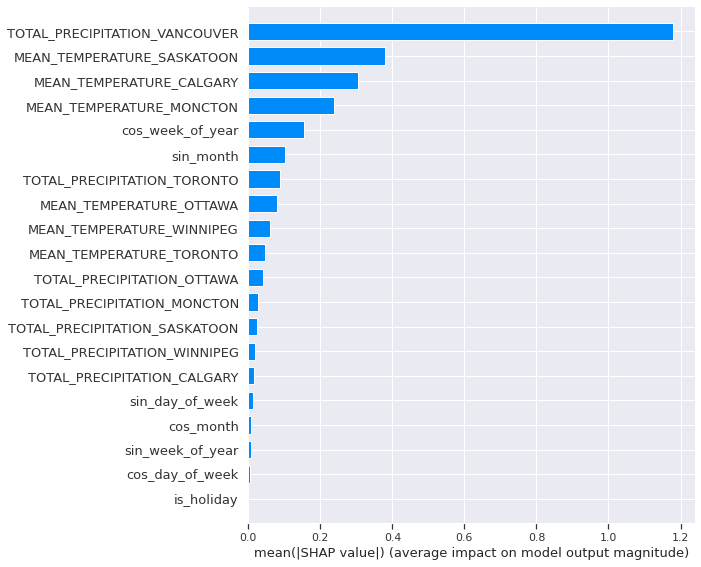

In [ ]:
EMModel.explainable_nowcast(df_full_features, nowcast_pred_data, fc, specific_prediction_sample_to_explain=29225, input_label_index_value=0, num_labels=26)